In [1]:
from ggs import *
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import openpyxl
import os
from scipy import signal
from detecta import detect_peaks
import matrixprofile as mp
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import minkowski
from fastdtw import fastdtw
import subprocess
from dtw import dtw

# Read the Data

In [296]:
AccFiles = os.listdir('./Data/allLabeled/Acceleration/')
fileNames = [i[:-4] for i in AccFiles if i[-4:]=='.csv'] 

accDict = {}
for i, key in enumerate(fileNames):
    accDict[key] = pd.read_csv('./Data/allLabeled/Acceleration/'+AccFiles[i], header=None)

trueSegDict = pd.read_excel('./Data/allLabeled/True segments/segments.xlsx', engine='openpyxl', sheet_name=None)

## Apply Filter

In [297]:
SR = accDict['Saeb'].values[1,0]
n=4; fc=4; w = fc/(SR/2)

accFiltDict = {}
segs = {}
for key in accDict.keys():
    b, a = signal.butter(n, w, 'low')
    accFiltDict[key] = signal.filtfilt(b, a, x=accDict[key].values[2:,:], axis=0)
    
    segs[key] = trueSegDict[key].values[:,1].astype('float64')*SR

accFiltDict['Saeb'] = accFiltDict['Saeb'][1210:46980,:]
tmp1 = np.sqrt(accFiltDict['Saeb'][:,0]**2 + accFiltDict['Saeb'][:,1]**2 + accFiltDict['Saeb'][:,2]**2)
accFiltDict['Saeb'] = np.hstack((accFiltDict['Saeb'], tmp1.reshape(tmp1.shape[0], 1)))

accFiltDict['Sahand'] = accFiltDict['Sahand'][5012:59980,:]
tmp2 = np.sqrt(accFiltDict['Sahand'][:,0]**2 + accFiltDict['Sahand'][:,1]**2 + accFiltDict['Sahand'][:,2]**2)
accFiltDict['Sahand'] = np.hstack((accFiltDict['Sahand'], tmp2.reshape(tmp2.shape[0], 1)))

## Filtered Signal and True Segments

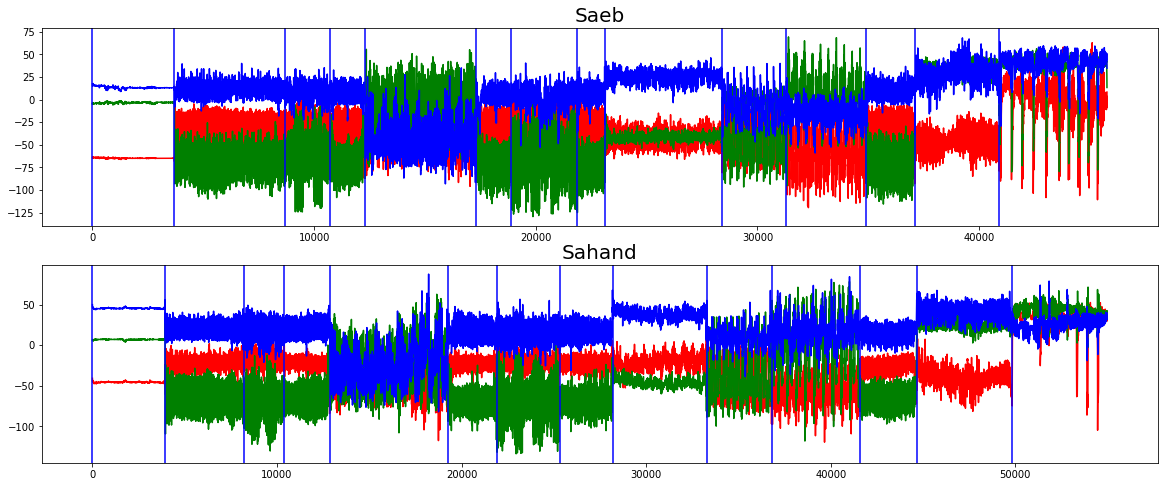

In [298]:
f, ax = plt.subplots(2,1, figsize=(20,8))
ax[0].plot(accFiltDict['Saeb'][:,0], c='r')
ax[0].plot(accFiltDict['Saeb'][:,1], c='g')
ax[0].plot(accFiltDict['Saeb'][:,2], c='b')
ax[0].set_title('Saeb', fontsize=20)
for v in segs['Saeb']:
    ax[0].axvline(v, c='b')

ax[1].plot(accFiltDict['Sahand'][:,0], c='r')
ax[1].plot(accFiltDict['Sahand'][:,1], c='g')
ax[1].plot(accFiltDict['Sahand'][:,2], c='b')
ax[1].set_title('Sahand', fontsize=20)
for v in segs['Sahand']:
    ax[1].axvline(v, c='b')

# Build Library of Queries for Each Task from Saeb

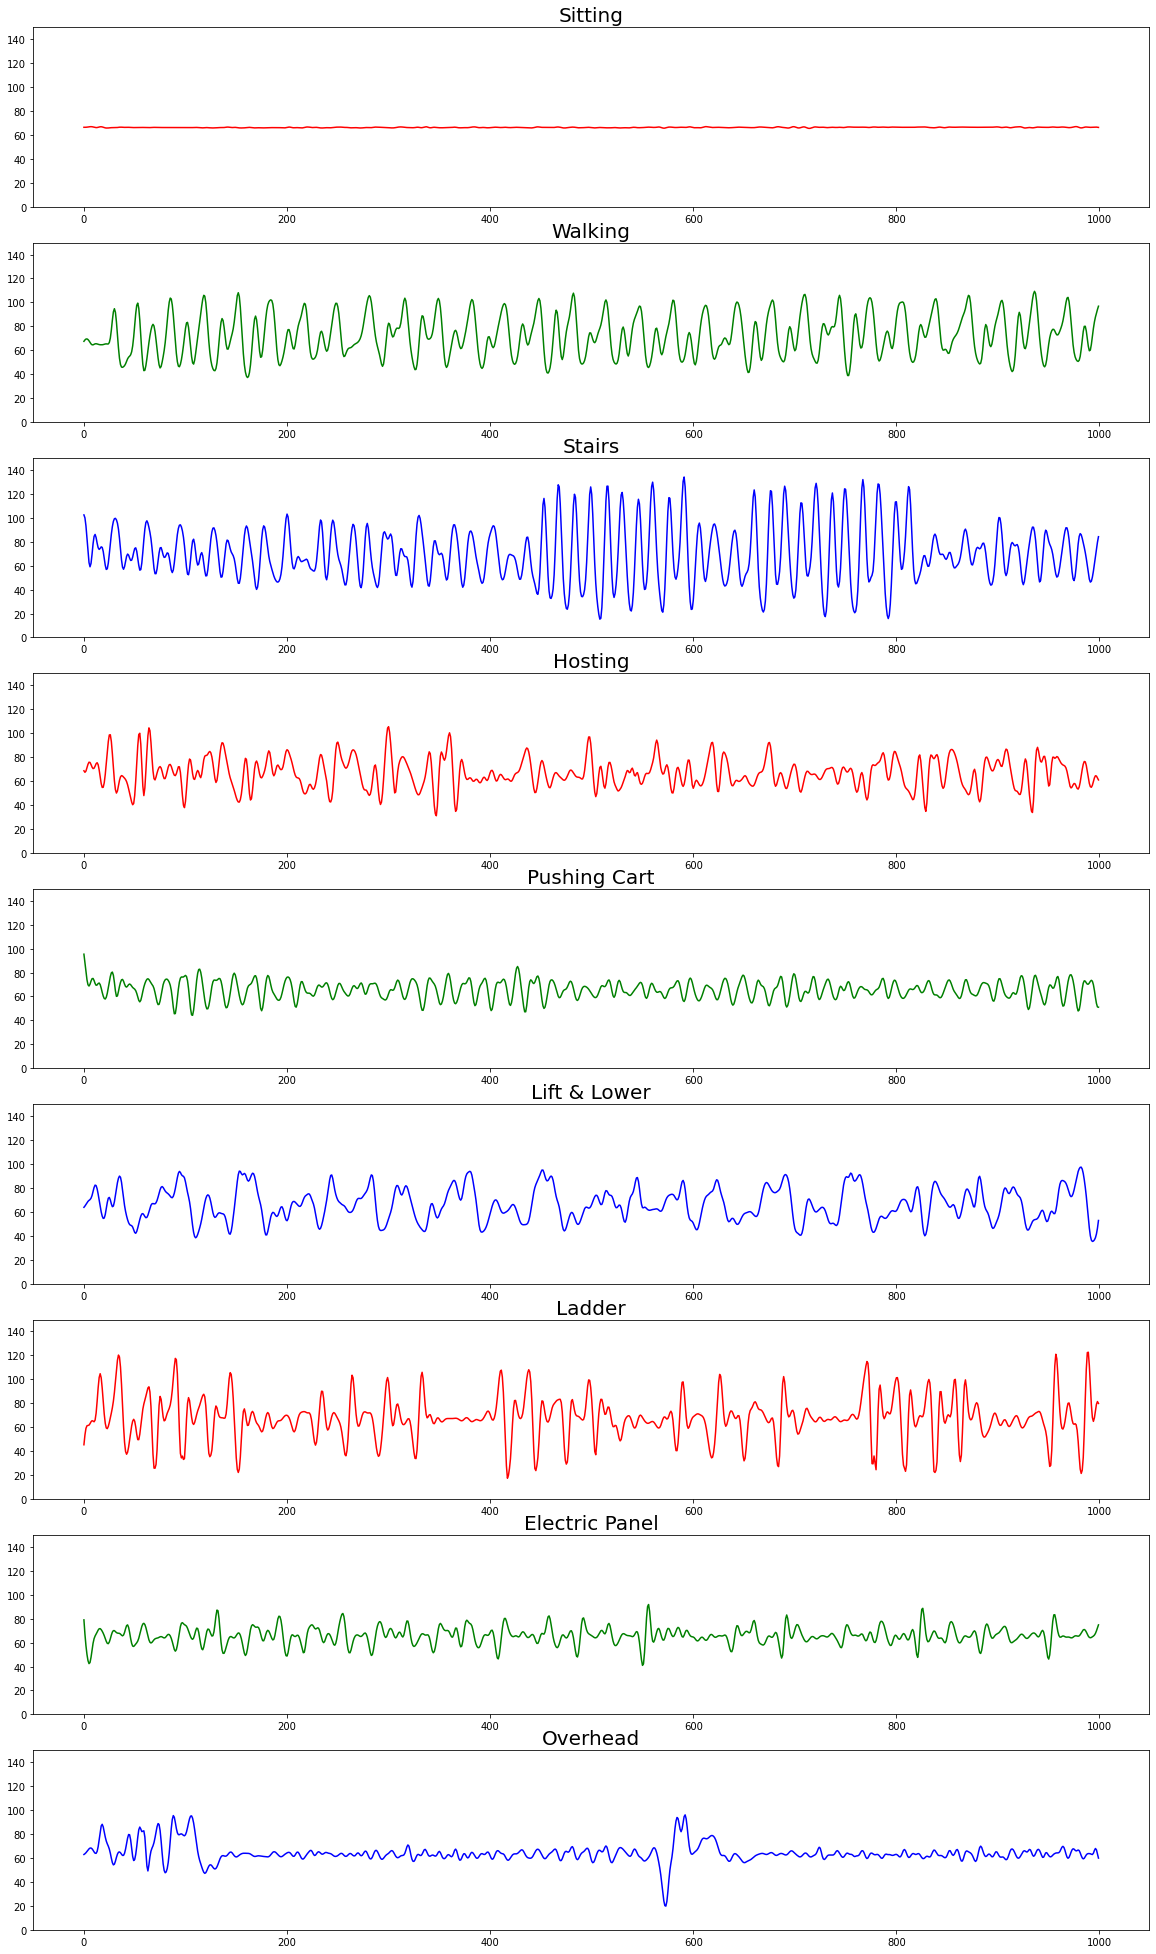

In [377]:
f, ax = plt.subplots(9,1, figsize=(20,35))

# Standing
tmpInd1 = int(segs['Saeb'][0]); tmpInd2 = int(segs['Saeb'][1])
# ax[0].plot(accFiltDict['Saeb'][tmpInd1:tmpInd2,3],c='r')
ax[0].plot(accFiltDict['Saeb'][tmpInd1:tmpInd1+1000,3],c='r')
ax[0].set_title('Sitting', fontsize=20)
ax[0].set_ylim([0, 150])

# Walking
tmpInd1 = int(segs['Saeb'][1]); tmpInd2 = int(segs['Saeb'][2])
# ax[1].plot(accFiltDict['Saeb'][tmpInd1:tmpInd2,3],c='g')
ax[1].plot(accFiltDict['Saeb'][tmpInd1:tmpInd1+1000,3],c='g')
ax[1].set_title('Walking', fontsize=20)
ax[1].set_ylim([0, 150])

# Stairs
tmpInd1 = int(segs['Saeb'][2]); tmpInd2 = int(segs['Saeb'][3])
# ax[2].plot(accFiltDict['Saeb'][tmpInd1:tmpInd2,3],c='b')
ax[2].plot(accFiltDict['Saeb'][tmpInd1:tmpInd1+1000,3],c='b')
ax[2].set_title('Stairs', fontsize=20)
ax[2].set_ylim([0, 150])

# Hoist
tmpInd1 = int(segs['Saeb'][4]); tmpInd2 = int(segs['Saeb'][5])
# ax[3].plot(accFiltDict['Saeb'][tmpInd1:tmpInd2,3],c='r')
ax[3].plot(accFiltDict['Saeb'][tmpInd1:tmpInd1+1000,3],c='r')
ax[3].set_title('Hosting', fontsize=20)
ax[3].set_ylim([0, 150])

# Pushing Cart
tmpInd1 = int(segs['Saeb'][8]); tmpInd2 = int(segs['Saeb'][9])
# ax[4].plot(accFiltDict['Saeb'][tmpInd1:tmpInd2,3],c='g')
ax[4].plot(accFiltDict['Saeb'][tmpInd1:tmpInd1+1000,3],c='g')
ax[4].set_title('Pushing Cart', fontsize=20)
ax[4].set_ylim([0, 150])

# Lift & Lower
tmpInd1 = int(segs['Saeb'][9]); tmpInd2 = int(segs['Saeb'][10])
# ax[5].plot(accFiltDict['Saeb'][tmpInd1:tmpInd2,3],c='b')
ax[5].plot(accFiltDict['Saeb'][tmpInd1:tmpInd1+1000,3],c='b')
ax[5].set_title('Lift & Lower', fontsize=20)
ax[5].set_ylim([0, 150])

# Ladder
tmpInd1 = int(segs['Saeb'][10]); tmpInd2 = int(segs['Saeb'][11])
# ax[6].plot(accFiltDict['Saeb'][tmpInd1:tmpInd2,3],c='r')
ax[6].plot(accFiltDict['Saeb'][tmpInd1:tmpInd1+1000,3],c='r')
ax[6].set_title('Ladder', fontsize=20)
ax[6].set_ylim([0, 150])

# Electric Panel
tmpInd1 = int(segs['Saeb'][12]); tmpInd2 = int(segs['Saeb'][13])
# ax[7].plot(accFiltDict['Saeb'][tmpInd1:tmpInd2,3],c='g')
ax[7].plot(accFiltDict['Saeb'][tmpInd1:tmpInd1+1000,3],c='g')
ax[7].set_title('Electric Panel', fontsize=20)
ax[7].set_ylim([0, 150])

# Overhead
tmpInd1 = int(segs['Saeb'][13])#; tmpInd2 = int(segs['Saeb'][14])
# ax[8].plot(accFiltDict['Saeb'][tmpInd1:tmpInd2,3],c='b')
ax[8].plot(accFiltDict['Saeb'][tmpInd1:tmpInd1+1000,3],c='b')
ax[8].set_title('Overhead', fontsize=20)
ax[8].set_ylim([0, 150])

plt.show()

# Motif Discovery

In [300]:
# (segs[sub][1] - 3694)/32

In [301]:
sub = 'Saeb'
sitting = accFiltDict[sub][int(segs[sub][0]):int(segs[sub][1]), 3]
walking = accFiltDict[sub][int(segs[sub][1]):int(segs[sub][2]), 3]
stairs = accFiltDict[sub][int(segs[sub][2]):int(segs[sub][3]), 3]
hoisting = accFiltDict[sub][int(segs[sub][4]):int(segs[sub][5]), 3]
push = accFiltDict[sub][int(segs[sub][8]):int(segs[sub][9]), 3]
lift = accFiltDict[sub][int(segs[sub][9]):int(segs[sub][10]), 3]
ladder = accFiltDict[sub][int(segs[sub][10]):int(segs[sub][11]), 3]
panel = accFiltDict[sub][int(segs[sub][12]):int(segs[sub][13]), 3]
overhead = accFiltDict[sub][int(segs[sub][13]):, 3]

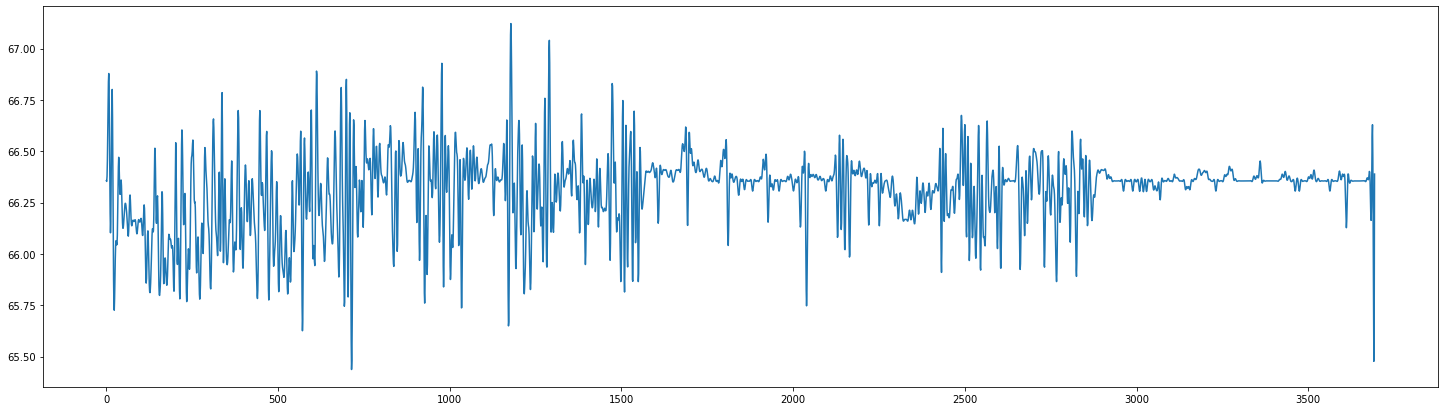

In [302]:
f, ax = plt.subplots(1,1,figsize=(25, 7))
ax.plot(sitting)

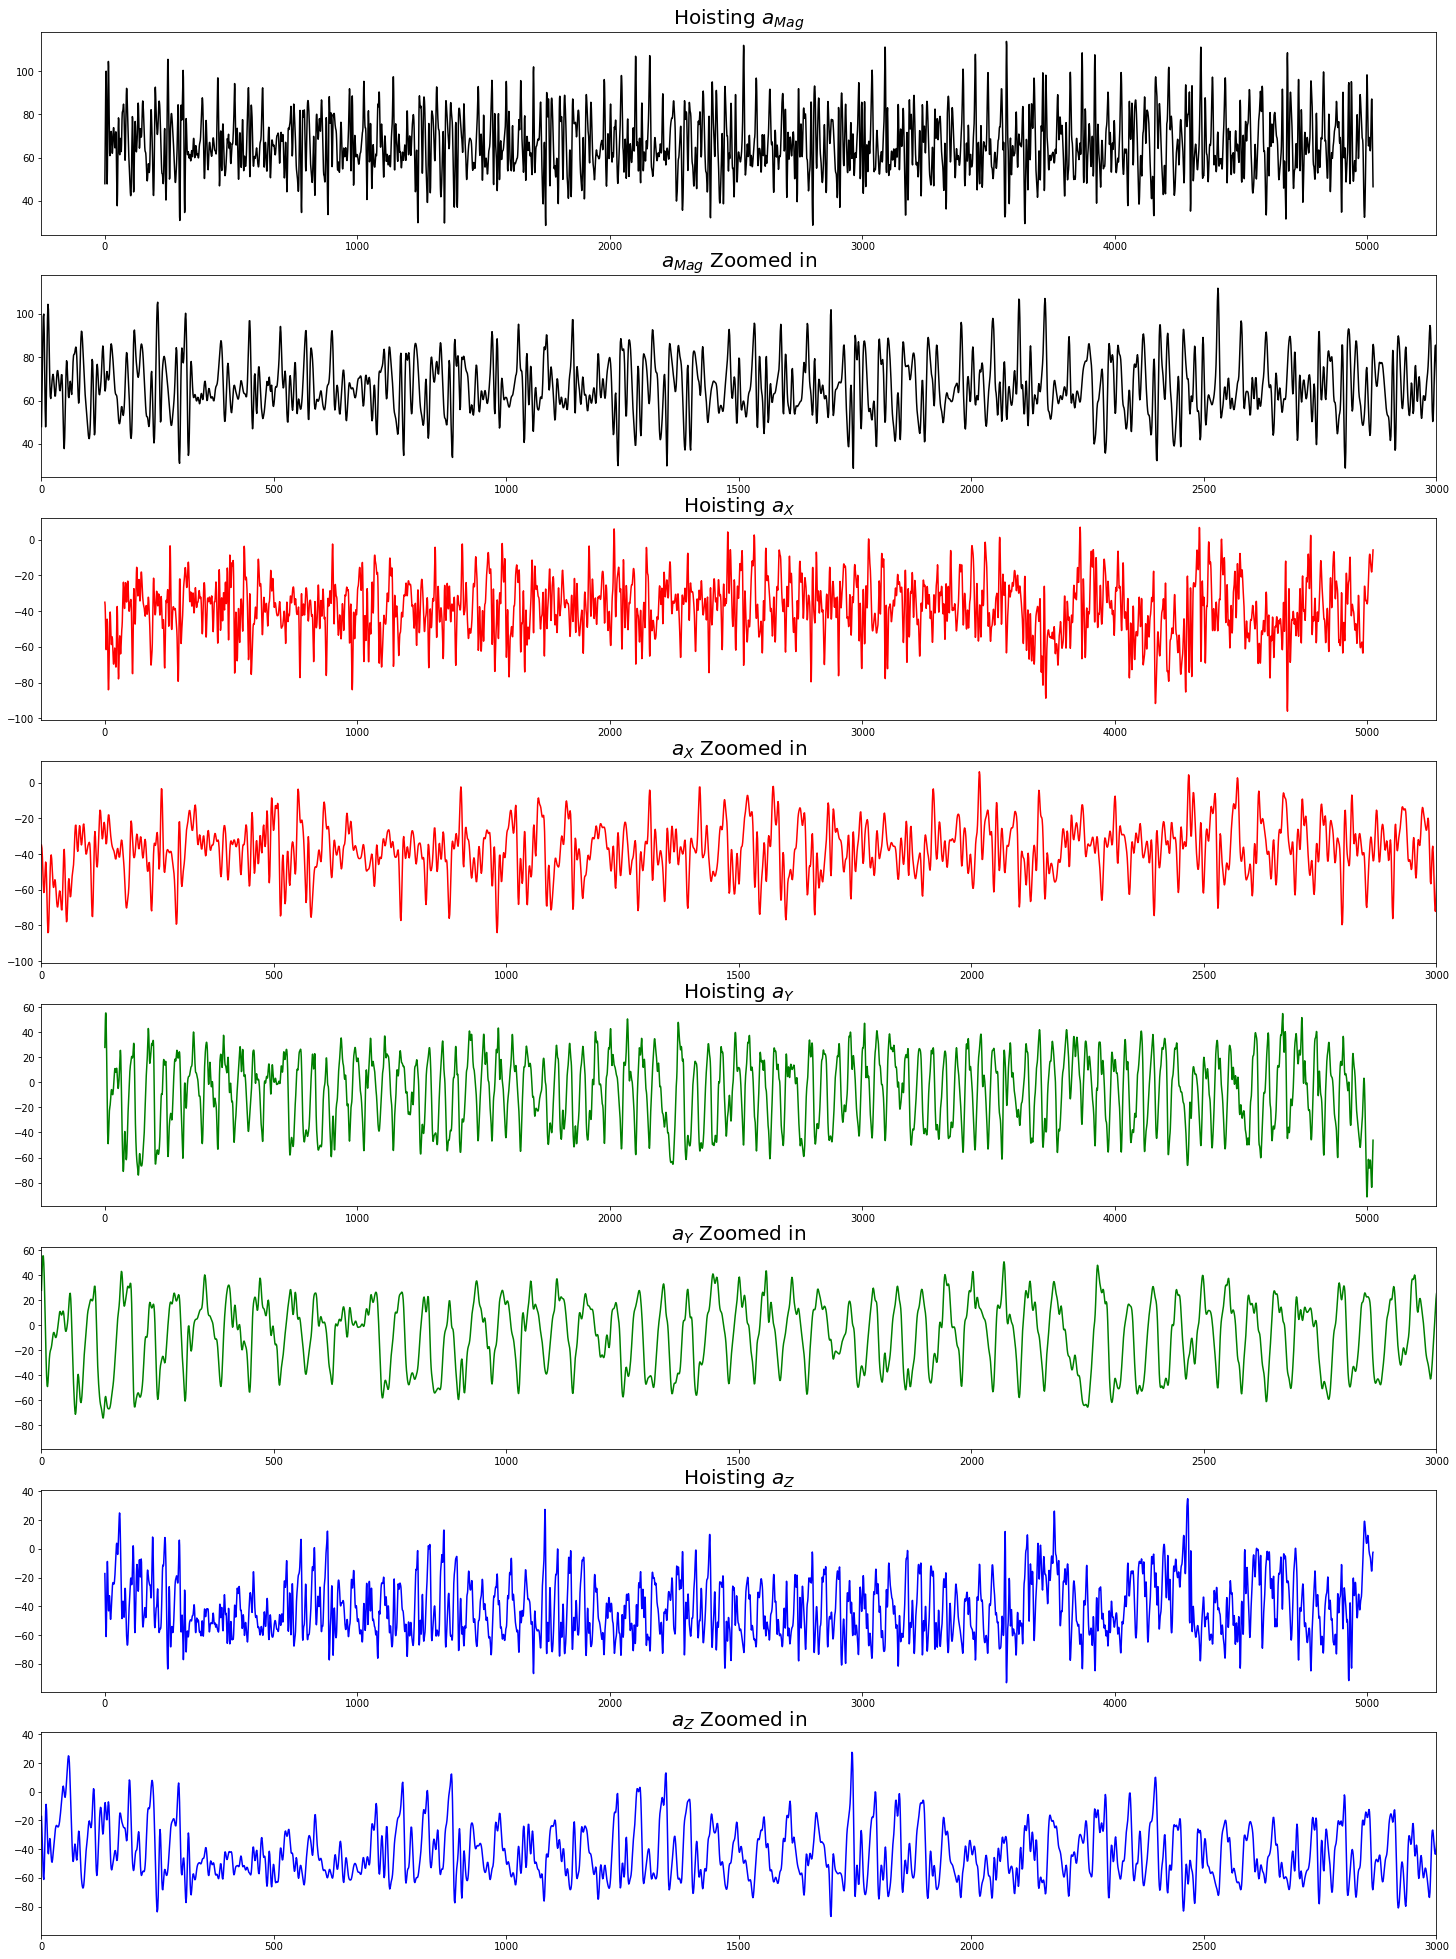

In [10]:
hoisting = accFiltDict[sub][int(segs[sub][4]):int(segs[sub][5]), :]

f, ax = plt.subplots(8,1, figsize=(25,35))

ax[0].plot(hoisting[:,3], c='k')
ax[0].set_title('Hoisting $a_{Mag}$', fontsize=20)

ax[1].plot(hoisting[:,3], c='k')
ax[1].set_xlim([0, 3000])
ax[1].set_title('$a_{Mag}$ Zoomed in', fontsize=20)

ax[2].plot(hoisting[:,0], c='r')
ax[2].set_title('Hoisting $a_X$', fontsize=20)

ax[3].plot(hoisting[:,0], c='r')
ax[3].set_xlim([0, 3000])
ax[3].set_title('$a_X$ Zoomed in', fontsize=20)

ax[4].plot(hoisting[:,1], c='g')
ax[4].set_title('Hoisting $a_Y$', fontsize=20)

ax[5].plot(hoisting[:,1], c='g')
ax[5].set_xlim([0, 3000])
ax[5].set_title('$a_Y$ Zoomed in', fontsize=20)

ax[6].plot(hoisting[:,2], c='b')
ax[6].set_title('Hoisting $a_Z$', fontsize=20)

ax[7].plot(hoisting[:,2], c='b')
ax[7].set_xlim([0, 3000])
ax[7].set_title('$a_Z$ Zoomed in', fontsize=20)

f.savefig('./hoisting2.png')
plt.show()

## MP Motif

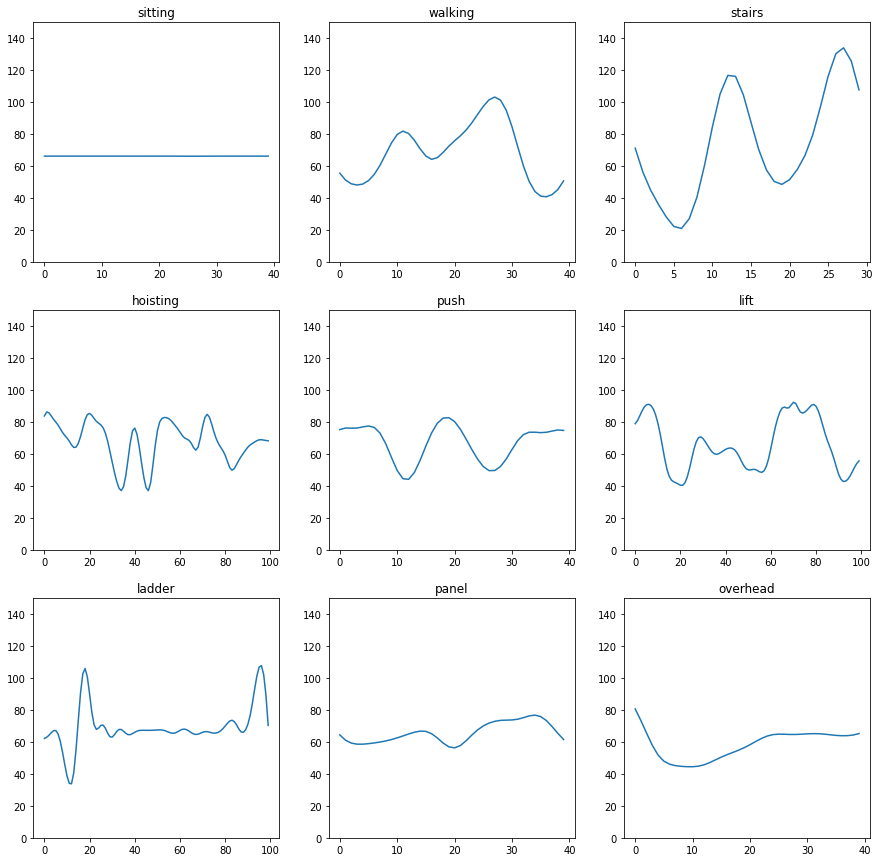

In [388]:
taskDict = {'sitting':sitting, 'walking':walking, 'stairs':stairs, 'hoisting':hoisting, 'push':push, 'lift':lift,
            'ladder':ladder, 'panel':panel, 'overhead':overhead}
windowLen = [40, 40, 30, 100, 40, 100, 100, 40, 40]
motifDict = {}
for taskName, task, wLen in zip(taskDict.keys(), taskDict.values(), windowLen):
    profile = mp.compute(task, windows=wLen)
    mots = mp.discover.motifs(profile, k=1, max_neighbors=20, radius=30)
    stInd = profile['motifs'][0]['motifs'][0]
    motifDict[taskName] = task[stInd:stInd+wLen]
###############Plot
f, ax = plt.subplots(3,3, figsize=(15,15))
ax = ax.ravel()

for i, key in enumerate(motifDict.keys()):
    ax[i].plot(motifDict[key])
    ax[i].set_title(key)
    ax[i].set_ylim([0, 150])
plt.show()

## Manually Define Motifs

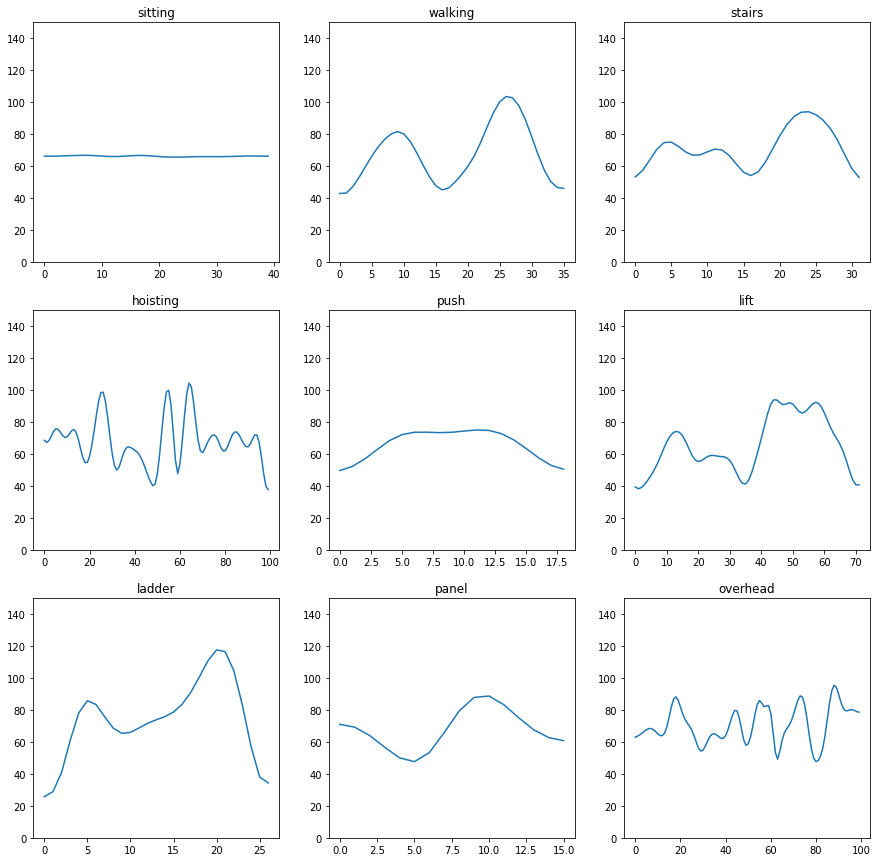

In [389]:
standingMotif = sitting[:40]
walkingMotif = walking[59:95]
stairsMotif = stairs[71:103]
hoistingMotif = hoisting[:100]
pushMotif = push[122:141]
liftMotif = lift[109:181]
ladderMotif = ladder[70:97]
panelMotif = panel[816:832]
overheadMotif = overhead[:100]
manualMotifDict = {'sitting':standingMotif, 'walking':walkingMotif, 'stairs':stairsMotif, 'hoisting':hoistingMotif,
            'push':pushMotif, 'lift':liftMotif, 'ladder':ladderMotif, 'panel':panelMotif, 'overhead':overheadMotif}
###############Plot
f, ax = plt.subplots(3,3, figsize=(15,15))
ax = ax.ravel()
for i, key in enumerate(manualMotifDict.keys()):
    ax[i].plot(manualMotifDict[key])
    ax[i].set_title(key)
    ax[i].set_ylim([0, 150])
#     ax[i].set_xlim([-20, 80])
plt.show()

# Similarity Searching Each Segment Using Different Motifs (Classificatn??)

## Search Walking Window using Different Motifs Based on DTW

In [97]:
startTime = time.time()
# manhattan_distance = lambda x, y: np.abs(x - y)
# customDist = lambda x, y: minkowski(x, y, p=7)
sig = taskDict['walking']
distDTW = {}
for key in manualMotifDict.keys(): 
    query = manualMotifDict[key]
    distDTW[key] = []
    for i in range(len(sig)-len(query)):
        tmp, _ = fastdtw(query, sig[i:i+len(query)], dist=euclidean)
        distDTW[key].append(tmp)
print('Elapsed Time = ', time.time() - startTime)

Elapsed Time =  619.6686198711395


In [98]:
valleys = {}
denominator = 1.5; percentile = 5
for key in distDTW.keys():
    signal_min = np.percentile(distDTW[key], percentile)
    signal_max = np.percentile(distDTW[key], 100-percentile)
    mph = (signal_max - signal_min)/denominator
    valleys[key] = detect_peaks(distDTW[key], mph, valley=True, mpd=30)

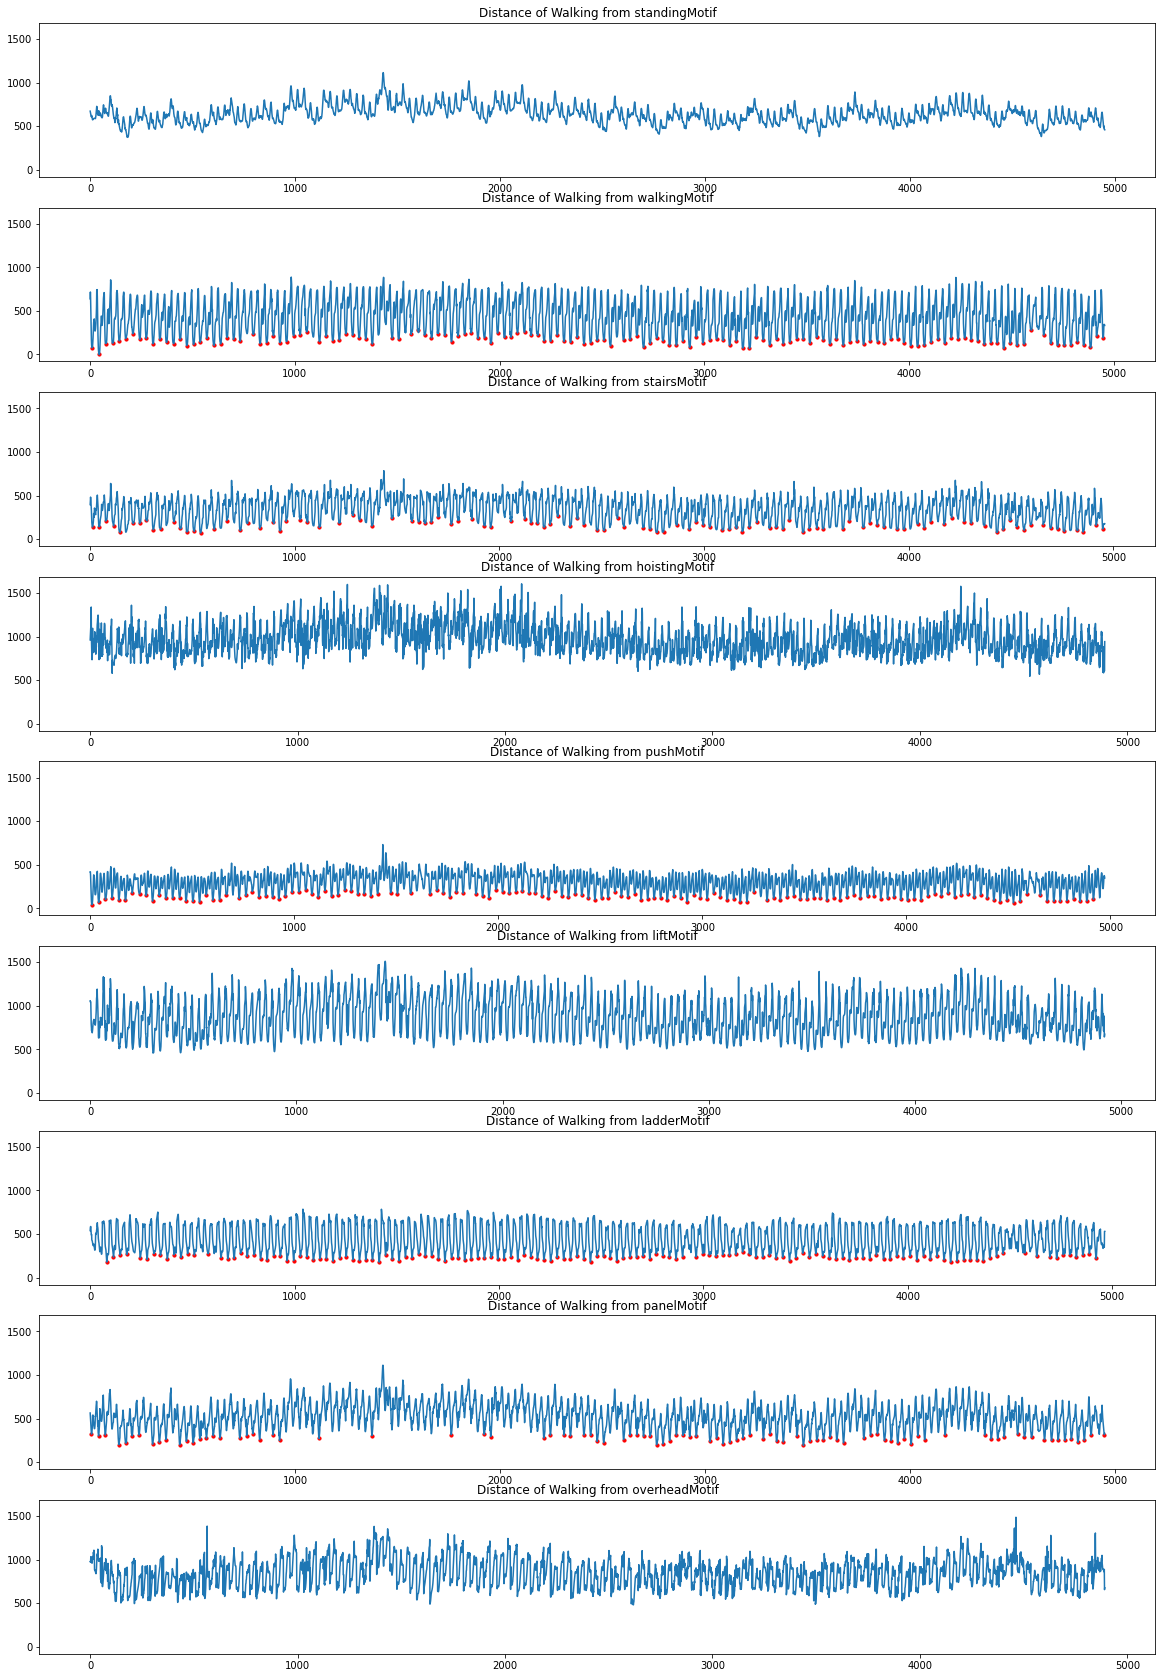

In [123]:
f, ax = plt.subplots(9,1, figsize=(20,30), sharey=True)
for i, key in enumerate(distDTW.keys()):
    ax[i].plot(distDTW[key])
    ax[i].scatter(valleys[key], np.array(distDTW[key])[valleys[key]], c='r', s=10)
    ax[i].set_title('Distance of Walking from ' + key + 'Motif')
# ax[0].set_ylim([0, 500])
plt.show()

## Search Walking Window using Different Motifs Based on Euclidean Distance

In [415]:
startTime = time.time()
manhattan_distance = lambda x, y: np.abs(x - y)
customDist = lambda x, y: minkowski(x, y, p=7)
task_ = taskDict.keys()[4]
sig = taskDict[task_]
distED = {}
for key in manualMotifDict.keys(): 
    query = manualMotifDict[key]
    distED[key] = []
    for i in range(len(sig)-len(query)):
        tmp = euclidean(query, sig[i:i+len(query)])
        distED[key].append(tmp)
print('Elapsed Time = ', time.time() - startTime)

Elapsed Time =  0.44378185272216797


In [416]:
valleys = {}
denominator = 1.5; percentile = 5
for key in distED.keys():
    signal_min = np.percentile(distED[key], percentile)
    signal_max = np.percentile(distED[key], 100-percentile)
    mph = (signal_max - signal_min)/denominator
    valleys[key] = detect_peaks(distED[key], mph, valley=True, mpd=30)

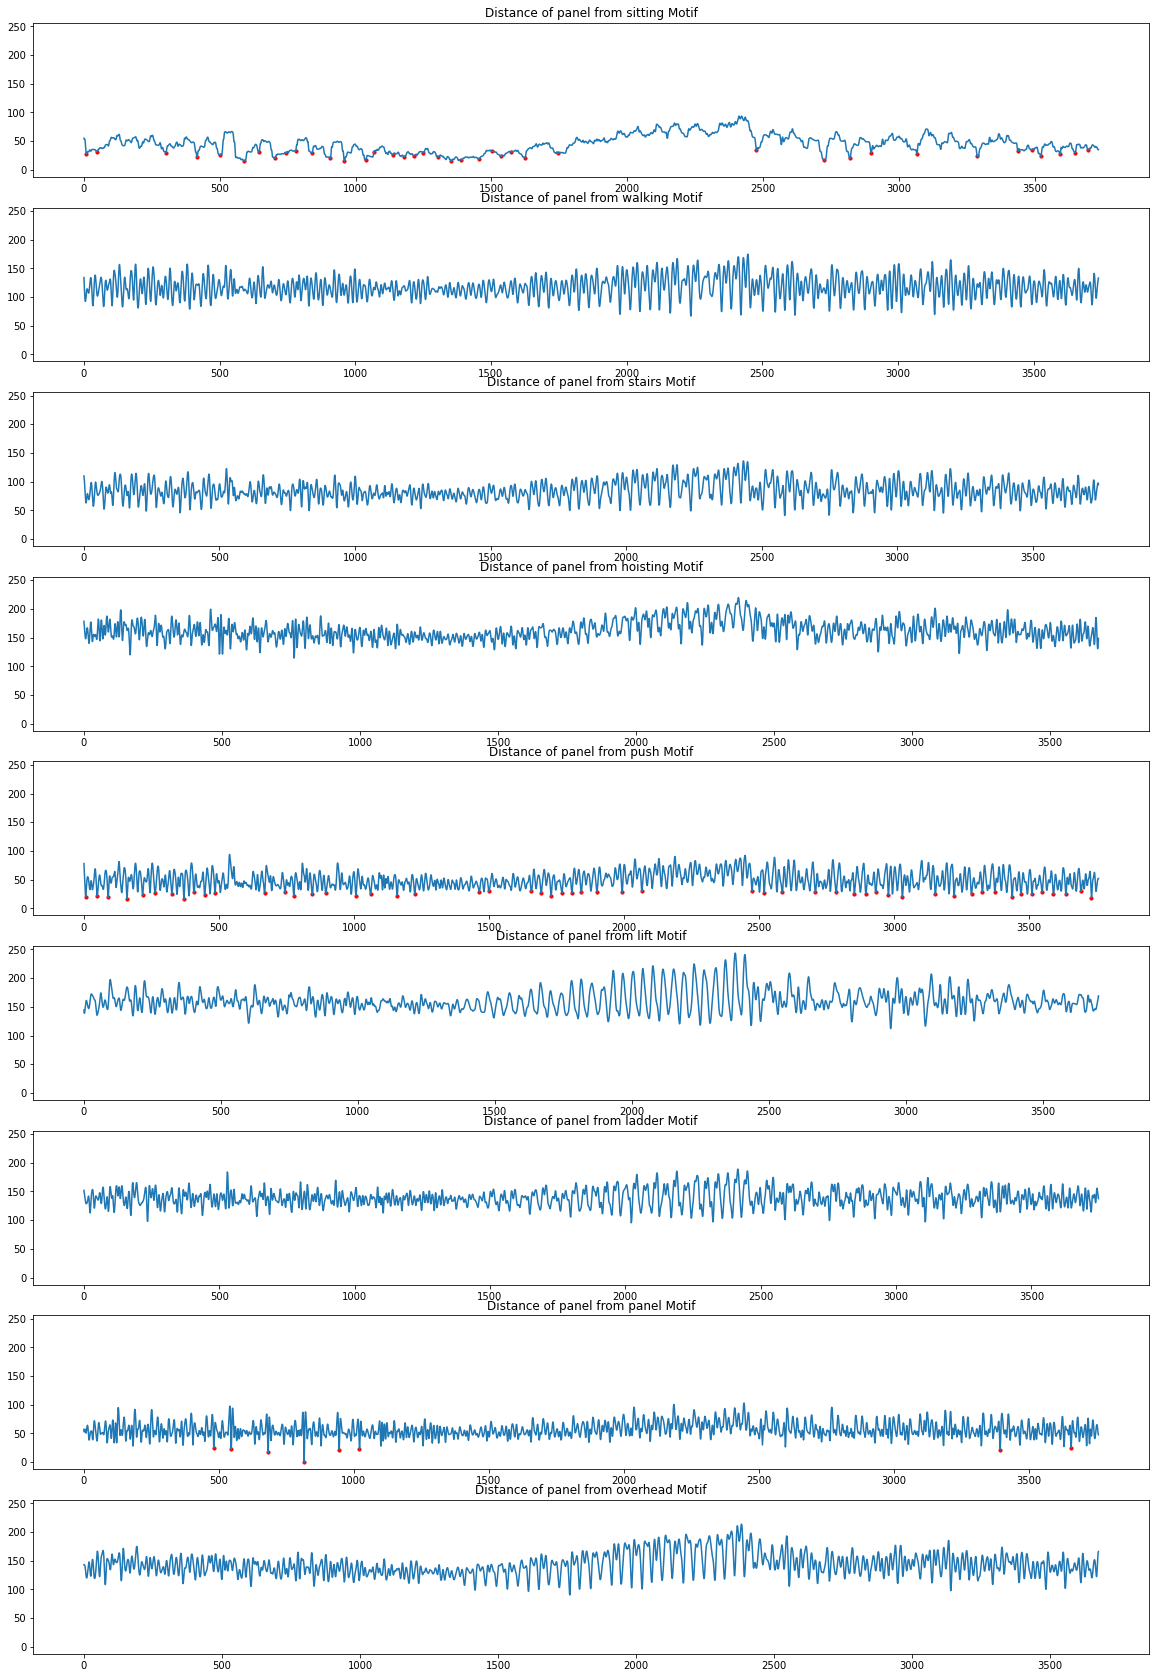

In [417]:
f, ax = plt.subplots(9,1, figsize=(20,30), sharey=True)
for i, key in enumerate(distED.keys()):
    ax[i].plot(distED[key])
    ax[i].scatter(valleys[key], np.array(distED[key])[valleys[key]], c='r', s=10)
    ax[i].set_title('Distance of ' + task_ + ' from ' + key + ' Motif')
# ax[0].set_ylim([0, 500])
plt.show()

In [418]:
sig = taskDict['walking']

In [419]:
valleyDensity = pd.DataFrame(np.zeros((1, len(valleys))), columns=valleys.keys())
for key in valleys.keys():
    tmp = valleys[key].shape[0]/sig.shape[0]
    valleyDensity[key] = tmp
activity = valleyDensity.idxmax(axis=1)[0]
print('Signal belongs to {} activity.'.format(activity))

Signal belongs to push activity.


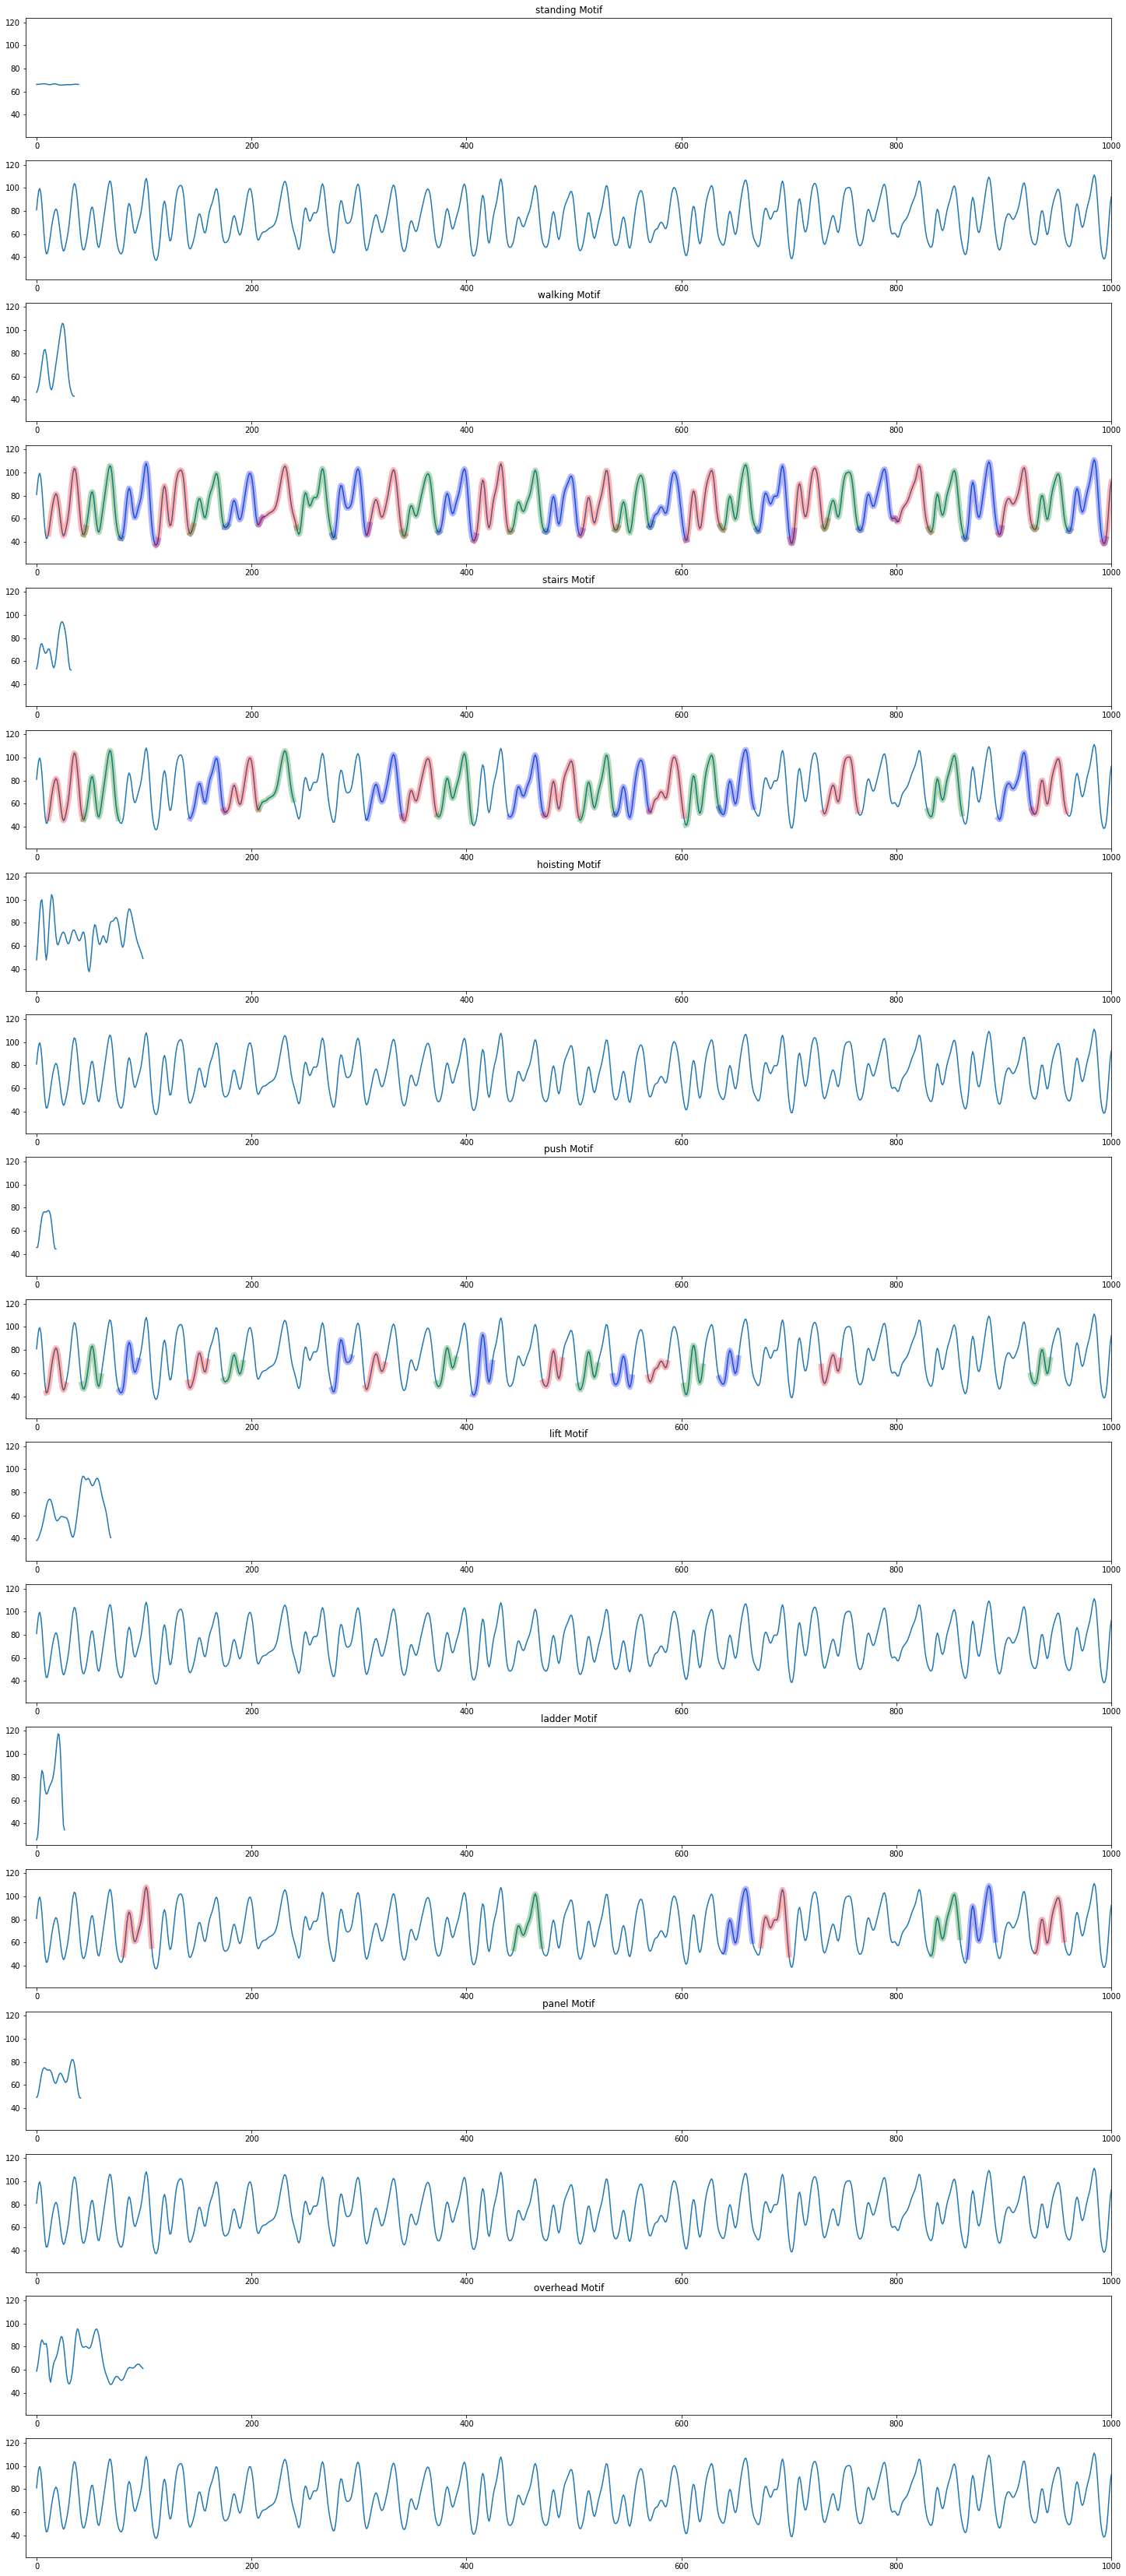

In [228]:
f, ax = plt.subplots(18,1, figsize=(25,60), sharey=True)
for i, key in enumerate(manualMotifDict.keys()):
    ax[2*i].plot(manualMotifDict[key])
    ax[2*i].set_xlim([-10, 1000])
    ax[2*i].set_title(key+' Motif')
    ax[2*i+1].plot(taskDict['walking'])
    ax[2*i+1].set_xlim([-10, 1000])
    color = np.repeat([['r', 'g', 'b']], len(valleys[key])//3+3, axis=0).flatten()[:len(valleys[key])]
    for st, col in zip(valleys[key], color):
        ax[2*i+1].plot(range(st, st+len(manualMotifDict[key])), taskDict['walking'][st:st+len(manualMotifDict[key])], c=col, alpha=0.3, linewidth=7)
plt.show()

# Try to correctly classify 1- walking, 2- 

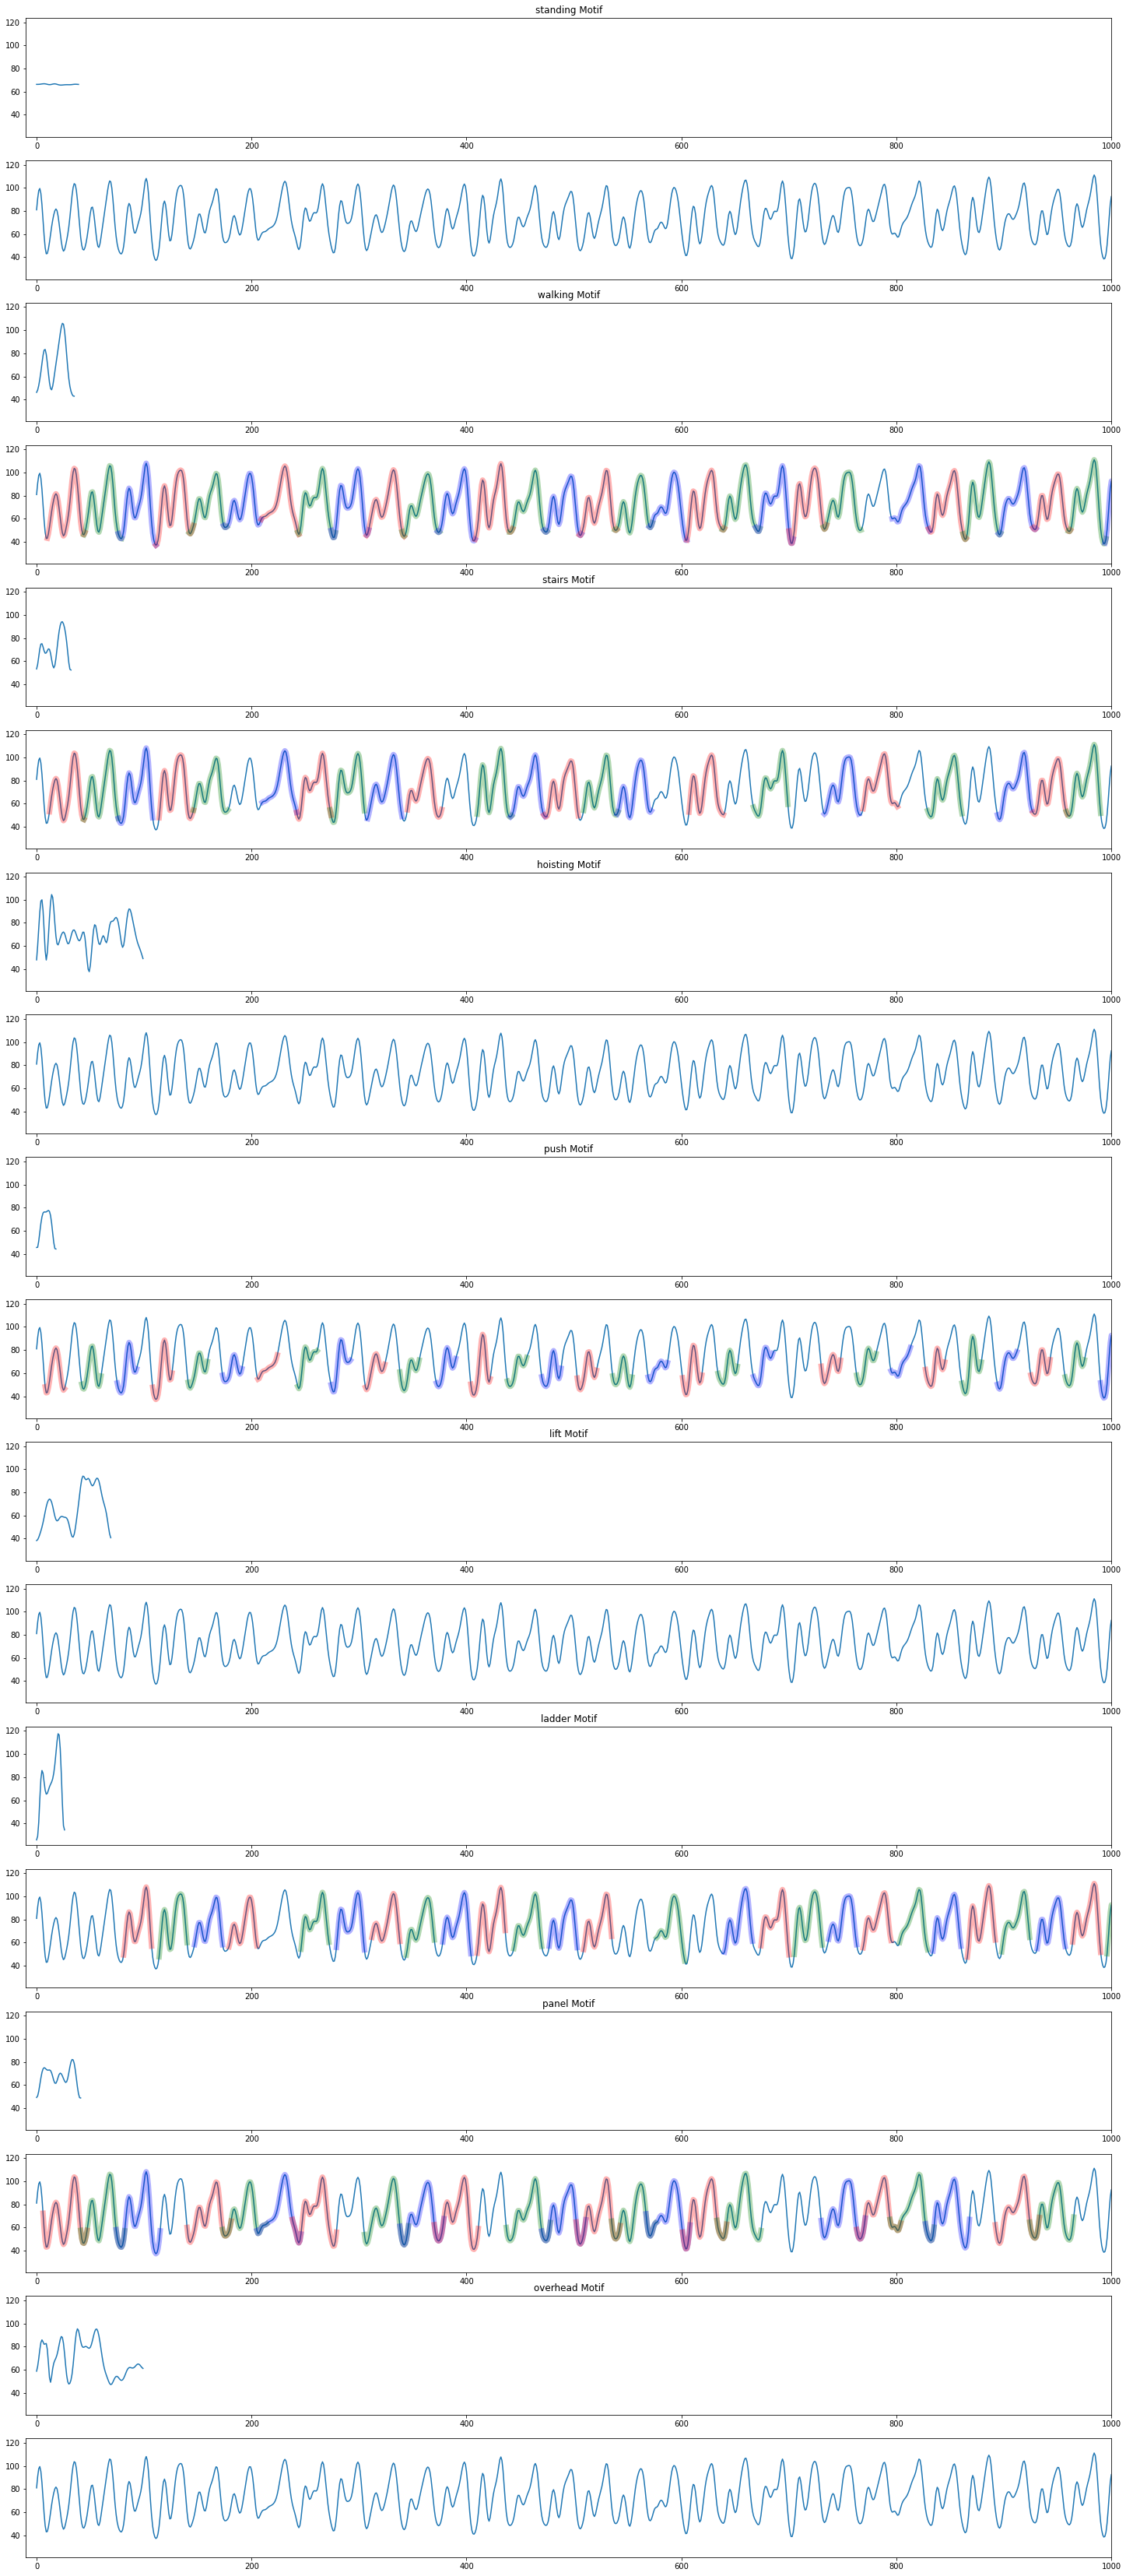

In [122]:
f, ax = plt.subplots(18,1, figsize=(25,60), sharey=True)
for i, key in enumerate(manualMotifDict.keys()):
    ax[2*i].plot(manualMotifDict[key])
    ax[2*i].set_xlim([-10, 1000])
    ax[2*i].set_title(key+' Motif')
    ax[2*i+1].plot(taskDict['walking'])
    ax[2*i+1].set_xlim([-10, 1000])
    color = np.repeat([['r', 'g', 'b']], len(valleys[key])//3+3, axis=0).flatten()[:len(valleys[key])]
    for st, col in zip(valleys[key], color):
        ax[2*i+1].plot(range(st, st+len(manualMotifDict[key])), taskDict['walking'][st:st+len(manualMotifDict[key])], c=col, alpha=0.3, linewidth=7)
plt.show()

## DTW with Manhatan Distance

In [ ]:
distance.pdist()

In [86]:
import Cython

In [87]:
startTime = time.time()
sig2 = taskDict['walking']
dist2 = {}
for key in manualMotifDict.keys():
    query2 = manualMotifDict[key]
    dist2[key] = []
    for i in range(len(sig2)-len(query2)):
        tmp, _ = fastdtw(query2, sig2[i:i+len(query2)], dist=euclidean)
        dist2[key].append(tmp)
print('Elapsed Time = ', time.time() - startTime)

KeyboardInterrupt: 

In [80]:
valleys = {}
denominator = 1.5; percentile = 5
for key in dist2.keys():
    signal_min = np.percentile(dist2[key], percentile)
    signal_max = np.percentile(dist2[key], 100-percentile)
    mph = (signal_max - signal_min)/denominator
    valleys[key] = detect_peaks(dist2[key], mph, valley=True, mpd=30)

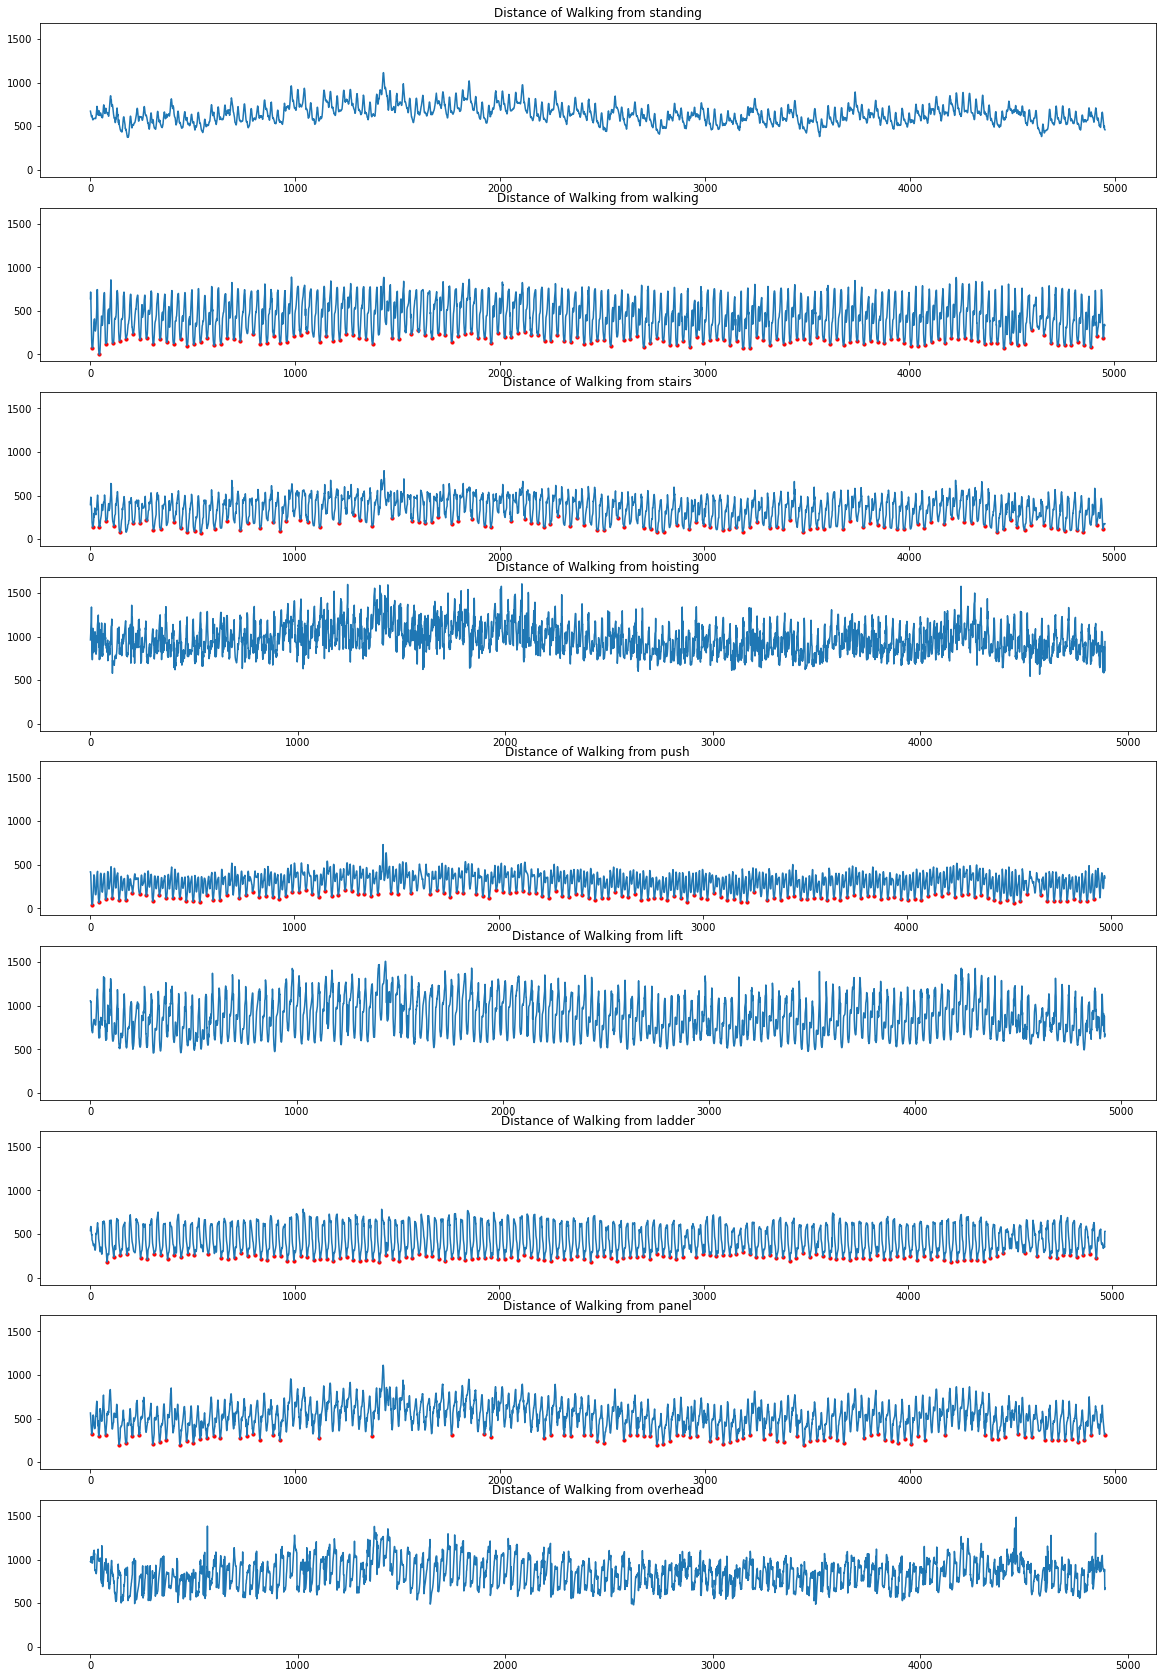

In [81]:
f, ax = plt.subplots(9,1, figsize=(20,30), sharey=True)
for i, key in enumerate(dist2.keys()):
    ax[i].plot(dist2[key])
    ax[i].scatter(valleys[key], np.array(dist2[key])[valleys[key]], c='r', s=10)
    ax[i].set_title('Distance of Walking from ' + key)
plt.show()

In [204]:
denominator = 1.5; percentile = 5
signal_min = np.percentile(dist, percentile)
signal_max = np.percentile(dist, 100-percentile)
mph = (signal_max - signal_min)/denominator
valleys = detect_peaks(dist, mph, valley=True, mpd=200)

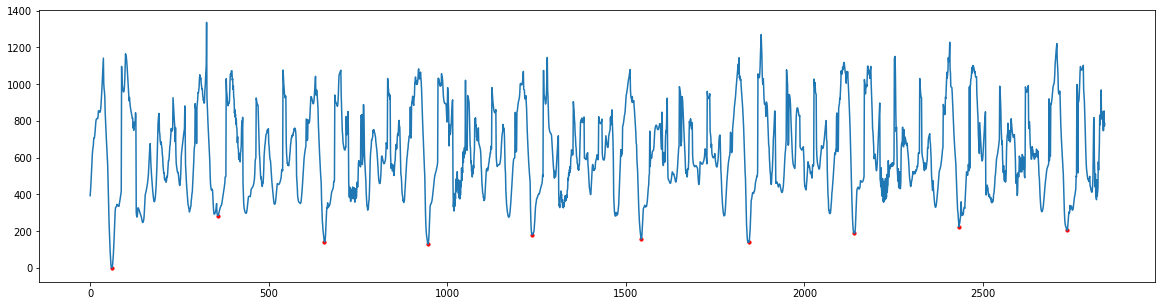

In [205]:
f, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(dist)
ax.scatter(valleys, np.array(dist)[valleys], c='r', s=10)
plt.show()

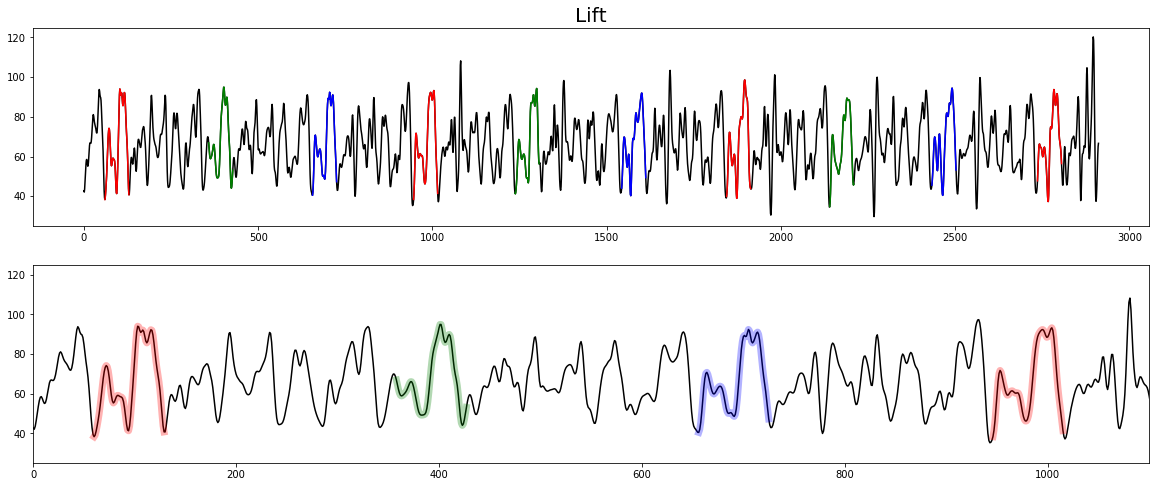

In [208]:
f, ax = plt.subplots(2,1, figsize=(20,8))
ax[0].plot(lift, c='k')
color = np.repeat([['r', 'g', 'b']], len(valleys)//3+3, axis=0).flatten()[:len(valleys)]
for st, col in zip(valleys, color):
    ax[0].plot(range(st, st+len(liftQuery)), lift[st:st+len(liftQuery)], c=col)
ax[0].set_title('Lift', fontsize=20)

ax[1].plot(lift, c='k')
ax[1].set_xlim([0, 1100])
color = np.repeat([['r', 'g', 'b']], len(valleys)//3+3, axis=0).flatten()[:len(valleys)]
for st, col in zip(valleys, color):
    ax[1].plot(range(st, st+len(liftQuery)), lift[st:st+len(liftQuery)], c=col, alpha=0.3, Linewidth=7)
plt.show()

## Ladder

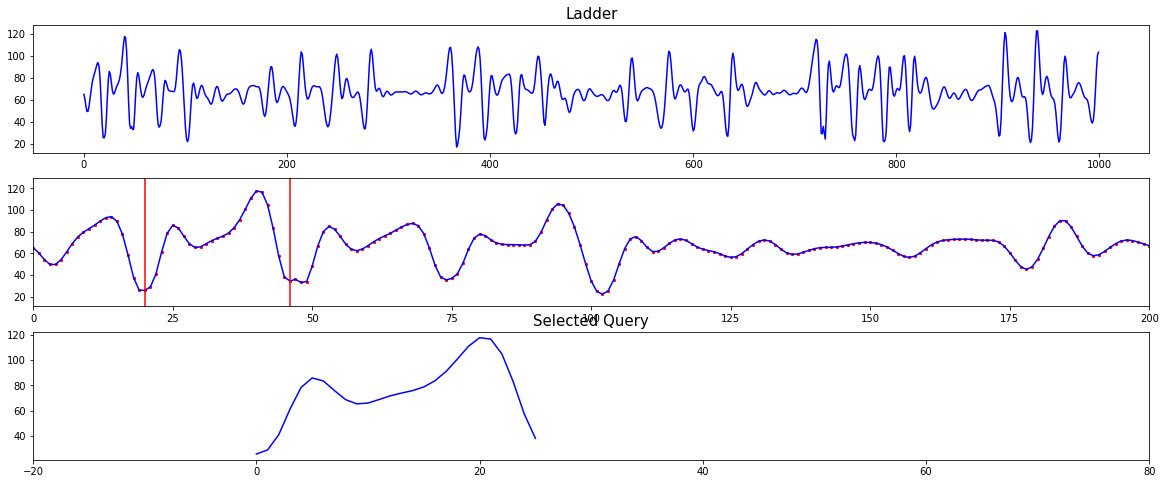

In [235]:
f, ax = plt.subplots(3, 1, figsize=(20,8))
ax[0].plot(ladder[:1000], c='b')
ax[0].set_title('Ladder', fontsize=15)

ax[1].plot(ladder[:1000], c='b')
ax[1].set_xlim([0,200])
ax[1].scatter(range(0, 1000), ladder[:1000], c='r', s=5)
ax[1].axvline(20, c='r')
ax[1].axvline(46, c='r')

ax[2].plot(ladder[20:46], c='b')
ax[2].set_title('Selected Query', fontsize=15)
ax[2].set_xlim([-20,80])
plt.show()

In [222]:
startTime = time.time()
ladderQuery = ladder[20:46]
dist = []
for i in range(len(ladder)-len(ladderQuery)):
    tmp, _ = fastdtw(ladderQuery, ladder[i:i+len(ladderQuery)], dist=euclidean)
    dist.append(tmp)
print('Elapsed Time = ', time.time() - startTime)

Elapsed Time =  42.2315616607666


In [232]:
denominator = 1.7; percentile = 5
signal_min = np.percentile(dist, percentile)
signal_max = np.percentile(dist, 100-percentile)
mph = (signal_max - signal_min)/denominator
valleys = detect_peaks(dist, mph, valley=True)#, mpd=200)

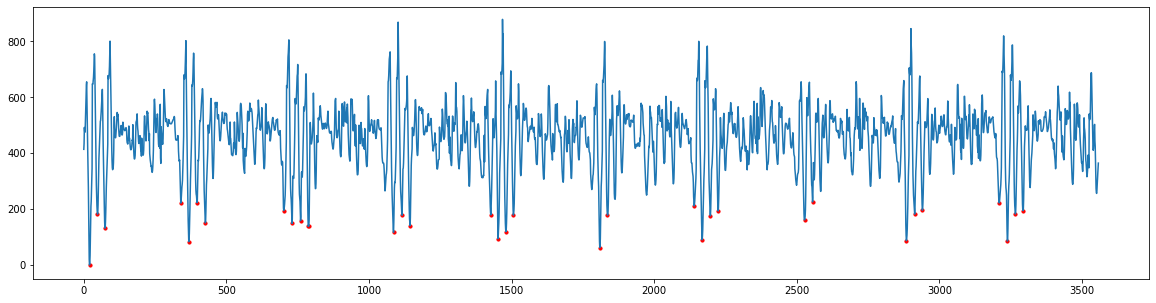

In [233]:
f, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(dist)
ax.scatter(valleys, np.array(dist)[valleys], c='r', s=10)
plt.show()

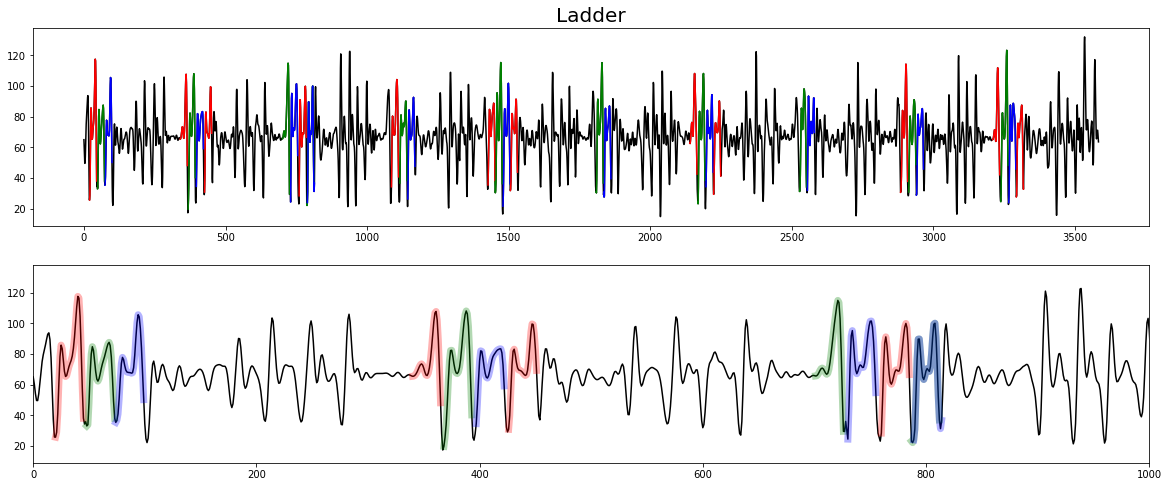

In [234]:
f, ax = plt.subplots(2,1, figsize=(20,8))
ax[0].plot(ladder, c='k')
color = np.repeat([['r', 'g', 'b']], len(valleys)//3+3, axis=0).flatten()[:len(valleys)]
for st, col in zip(valleys, color):
    ax[0].plot(range(st, st+len(ladderQuery)), ladder[st:st+len(ladderQuery)], c=col)
ax[0].set_title('Ladder', fontsize=20)

ax[1].plot(ladder, c='k')
ax[1].set_xlim([0, 1000])
color = np.repeat([['r', 'g', 'b']], len(valleys)//3+3, axis=0).flatten()[:len(valleys)]
for st, col in zip(valleys, color):
    ax[1].plot(range(st, st+len(ladderQuery)), ladder[st:st+len(ladderQuery)], c=col, alpha=0.3, Linewidth=7)
plt.show()

## Ladder

In [230]:
queryMass = mp.algorithms.mass2(mp_sig2, query=motif1, extras=False, threshold=1e-10)

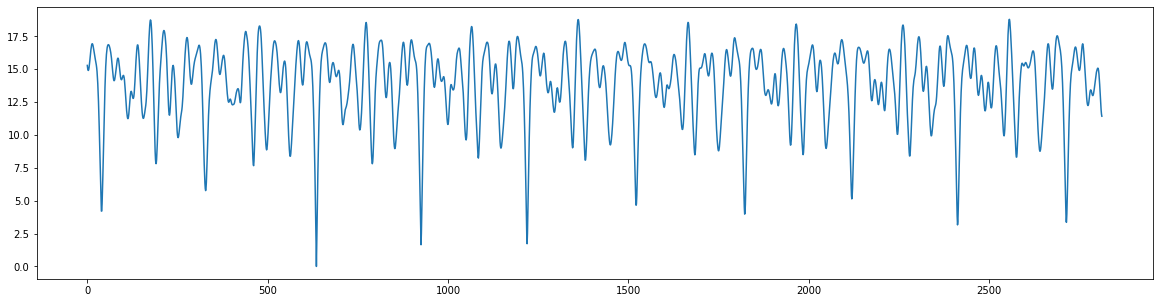

In [231]:
f, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(queryMass)
plt.show()

## Detect Minima

In [232]:
denominator = 1.5; percentile = 5
signal_min = np.percentile(queryMass, percentile)
signal_max = np.percentile(queryMass, 100-percentile)
mph = (signal_max - signal_min)/denominator
valleys = detect_peaks(queryMass, mph, valley=True)

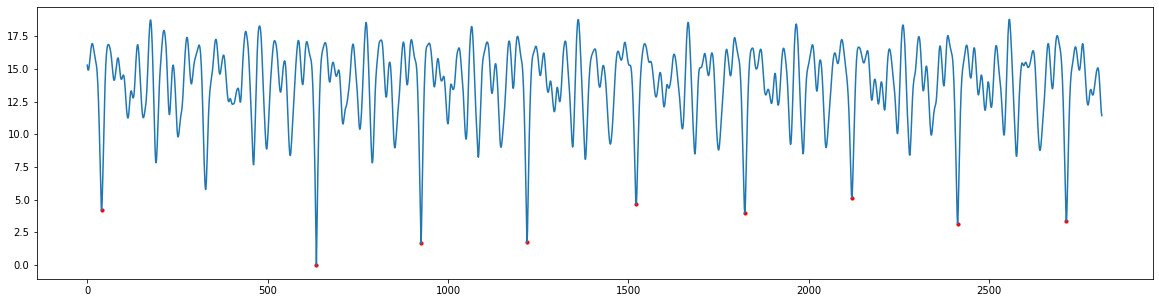

In [233]:
f, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(queryMass)
ax.scatter(valleys, queryMass[valleys], c='r', s=10)
plt.show()

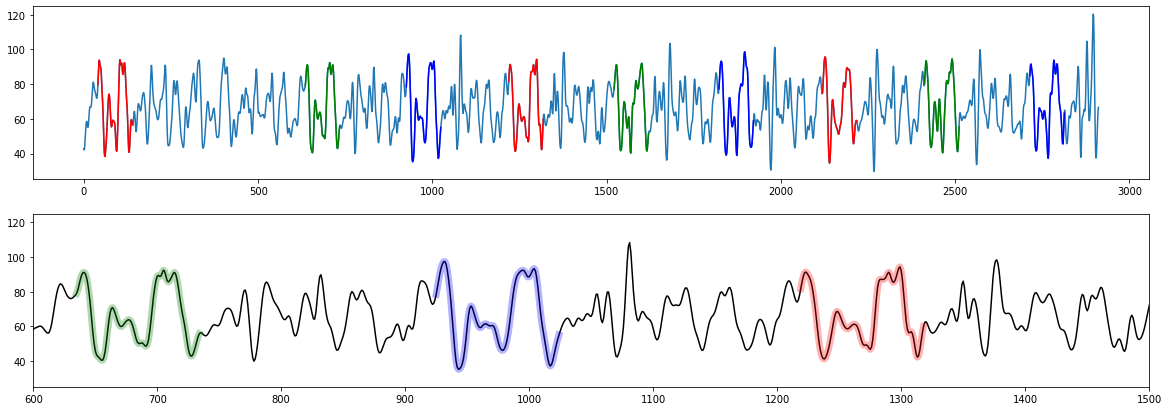

In [245]:
f, ax = plt.subplots(2,1, figsize=(20,7))
ax[0].plot(mp_sig2)
color = np.repeat([['r', 'g', 'b']], len(valleys)//3+3, axis=0).flatten()[:len(valleys)]
for st, col in zip(valleys, color):
    ax[0].plot(range(st, st+windowLen), mp_sig2[st:st+windowLen], c=col)

ax[1].plot(mp_sig2, c='k')
ax[1].set_xlim([600, 1500])
color = np.repeat([['r', 'g', 'b']], len(valleys)//3+3, axis=0).flatten()[:len(valleys)]
for st, col in zip(valleys, color):
    ax[1].plot(range(st, st+windowLen), mp_sig2[st:st+windowLen], c=col, alpha=0.3, Linewidth=7)

plt.show()

In [1]:
! jupyter nbconvert --to html 2021-01-19.ipynb

[NbConvertApp] Converting notebook 2021-01-19.ipynb to html
[NbConvertApp] Writing 2314268 bytes to 2021-01-19.html
